<a href="https://colab.research.google.com/github/Sakkiya/Analzed_Files-/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import timm
import torch
import torch.nn as nn
# Recreate model and load weights
num_classes = 4 # Define the number of classes based on your dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=num_classes)
model.load_state_dict(torch.load('/content/drive/MyDrive/models/vit_banana_model_3.pth', map_location=torch.device('cpu')))
model.eval()
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Path to your test image
img_path = '/content/drive/MyDrive/models/testdata/Yellow and Black Sigatoka/download-2-_jpeg.rf.313f7ac66e96744e87b7f81d94381dfa.jpg'

# Transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load and preprocess image
image = Image.open(img_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

In [ ]:
# Define class_names (replace with your actual class names)
class_names = ['Healthy', 'Panama Disease', 'Yellow and Black Sigatoka', 'xamthomonas']
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_class = class_names[predicted.item()]

print(f"Predicted class: {predicted_class}")

Predicted class: xamthomonas


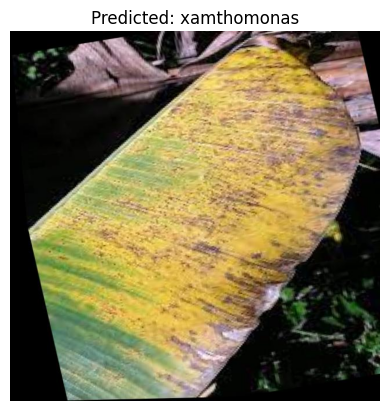

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()
